In [31]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import regression_measures as rm; reload(rm);

np.seterr(divide = 'ignore');


In [32]:
# load data into datawrapper classes
measure_data = mc.COVID19_measures(download_data = False, measure_level = 2, only_first_dates = True, expand_measure_names = True)
jhu_data     = cdc.CoronaData(download_data = False)

# remove and rename countries to match the JFU database and the measures database
measure_data.RemoveCountry('Diamond Princess')
measure_data.RenameCountry('France (metropole)', 'France')
measure_data.RenameCountry('South Korea', 'Korea, South')
measure_data.RenameCountry('Czech Republic', 'Czechia')


In [17]:
regrDF   = {}
maxshift = 15

shiftdaylist = np.arange(maxshift + 1)
smstddevlist = [10,12,15,20]
alphalist    = np.power(10, np.linspace(-6,-1,num=6))

for shiftdays in shiftdaylist:
    print('shiftdays = {}'.format(shiftdays))
    regrDF[shiftdays] = {}
    for smooth in smstddevlist:
        print('  smooth = {}'.format(smooth))
        regrDF[shiftdays][smooth], measurelist = rm.GetRegressionDF( jhu_data      = jhu_data,
                                                                     measure_data  = measure_data,
                                                                     countrylist   = measure_data.countrylist,
                                                                     shiftdays     = shiftdays,
                                                                     smooth_stddev = smooth)


shiftdays = 0
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 1
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 2
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 3
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 4
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 5
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 6
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 7
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 8
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 9
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 10
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 11
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 12
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 13
  smooth = 10
  smooth = 12
  smooth = 15
  smooth = 20
shiftdays = 14
 

In [18]:

for smooth in smstddevlist:
    print('smstddev = {:.6f}'.format(smooth))
    allres_smstddev = None

    for shiftdays in shiftdaylist:
        print('  shiftdays = {}'.format(shiftdays))

        for alpha in alphalist:
            print('     alpha = {:.6f}, time = {}'.format(alpha, datetime.datetime.now().strftime('%H:%M:%S')))
            
            resultDF = rm.CrossValidation( data                   = regrDF[shiftdays][smooth],
                                        outputheader           = {'shiftdays': shiftdays, 'alpha': alpha, 'smooth': smooth},
                                        alpha                  = alpha,
                                        countrycrossvalidation = True)

            if allres_smstddev is None:
                allres_smstddev = resultDF
            else:
                allres_smstddev = pd.concat([allres_smstddev, resultDF])
    # store results in csv
    allres_smstddev.to_csv('data/results_smstddev_200421_{:.0f}.csv'.format(smooth))

smstddev = 10.000000
  shiftdays = 0
     alpha = 0.000001, time = 01:24:51
     alpha = 0.000010, time = 01:25:03
     alpha = 0.000100, time = 01:25:18
     alpha = 0.001000, time = 01:25:30
     alpha = 0.010000, time = 01:25:38
     alpha = 0.100000, time = 01:25:44
  shiftdays = 1
     alpha = 0.000001, time = 01:25:49
     alpha = 0.000010, time = 01:26:02
     alpha = 0.000100, time = 01:26:13
     alpha = 0.001000, time = 01:26:24
     alpha = 0.010000, time = 01:26:32
     alpha = 0.100000, time = 01:26:38
  shiftdays = 2
     alpha = 0.000001, time = 01:26:43
     alpha = 0.000010, time = 01:26:57
     alpha = 0.000100, time = 01:27:10
     alpha = 0.001000, time = 01:27:20
     alpha = 0.010000, time = 01:27:27
     alpha = 0.100000, time = 01:27:33
  shiftdays = 3
     alpha = 0.000001, time = 01:27:38
     alpha = 0.000010, time = 01:27:51
     alpha = 0.000100, time = 01:28:03
     alpha = 0.001000, time = 01:28:14
     alpha = 0.010000, time = 01:28:21
     alpha = 0.100

     alpha = 0.001000, time = 02:12:15
     alpha = 0.010000, time = 02:12:24
     alpha = 0.100000, time = 02:12:31
  shiftdays = 1
     alpha = 0.000001, time = 02:12:37
     alpha = 0.000010, time = 02:12:53
     alpha = 0.000100, time = 02:13:08
     alpha = 0.001000, time = 02:13:20
     alpha = 0.010000, time = 02:13:29
     alpha = 0.100000, time = 02:13:36
  shiftdays = 2
     alpha = 0.000001, time = 02:13:42
     alpha = 0.000010, time = 02:13:58
     alpha = 0.000100, time = 02:14:14
     alpha = 0.001000, time = 02:14:28
     alpha = 0.010000, time = 02:14:37
     alpha = 0.100000, time = 02:14:44
  shiftdays = 3
     alpha = 0.000001, time = 02:14:50
     alpha = 0.000010, time = 02:15:06
     alpha = 0.000100, time = 02:15:21
     alpha = 0.001000, time = 02:15:33
     alpha = 0.010000, time = 02:15:43
     alpha = 0.100000, time = 02:15:49
  shiftdays = 4
     alpha = 0.000001, time = 02:15:55
     alpha = 0.000010, time = 02:16:11
     alpha = 0.000100, time = 02:16:27


In [ ]:
tmp = pd.read_csv('data/results_freqsmooth_200421_0.062500.csv',index_col=0)

tmp.head()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
20


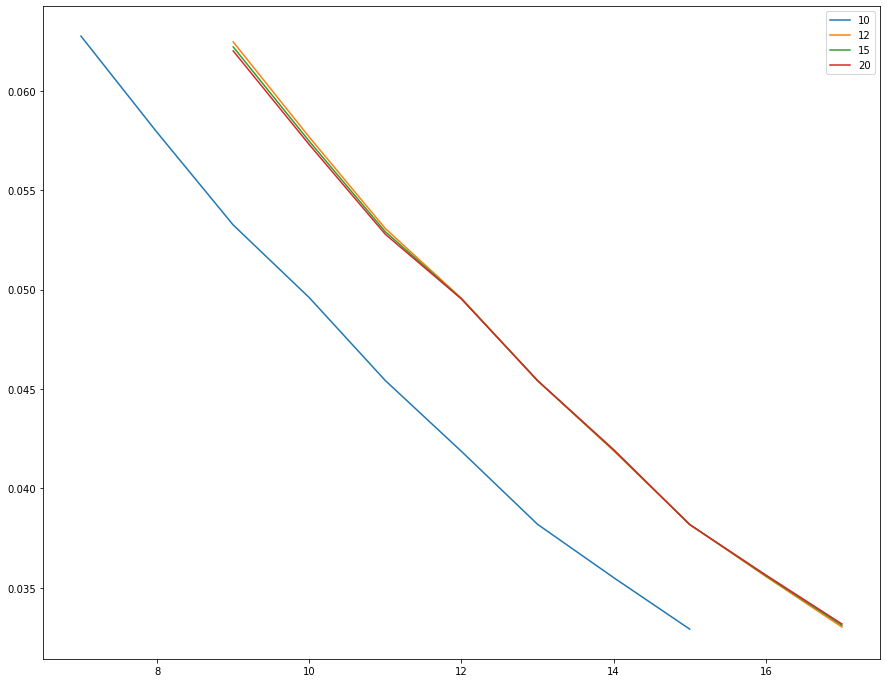

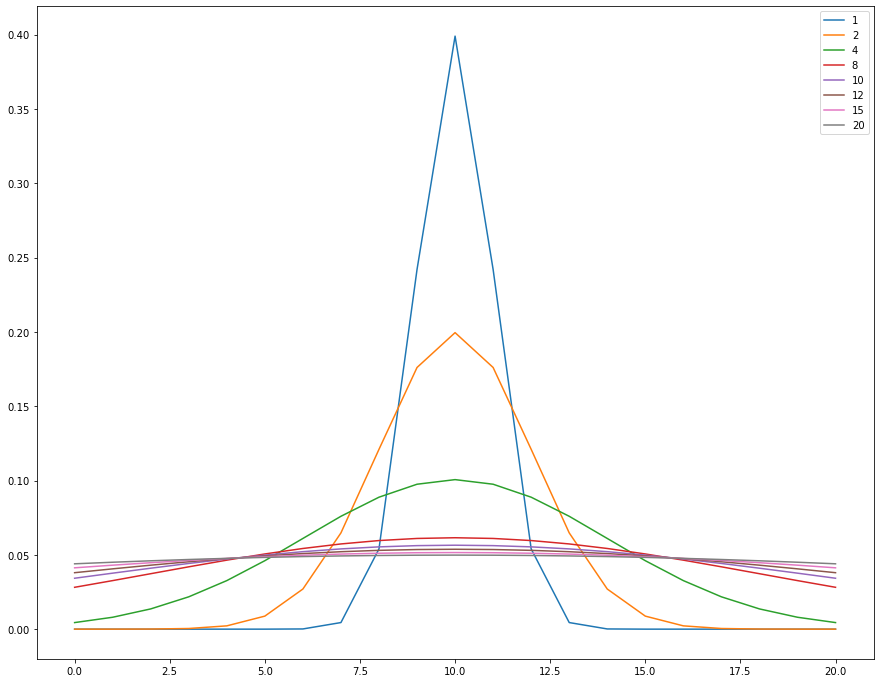

In [27]:
shiftdaylist = list(regrDF.keys())
smoothlist = list(regrDF[shiftdaylist[0]].keys())

print(shiftdaylist)
print(smooth)


for smooth in smoothlist:
    plt.plot(regrDF[shiftdaylist[0]][smooth][regrDF[shiftdaylist[0]][smooth]['Country'] == 'Germany']['Observable'],label = '{}'.format(smooth))
plt.legend()
plt.show()


def gauss(n = 21, stddev = 1):
    x = np.arange(n) - (n-1)/2
    e = np.exp(-0.5 * x**2/stddev**2)
    e /= np.sum(e)
    return e

smoothlist = [1,2,4,8,10,12,15,20]
for smooth in smoothlist:
    plt.plot(gauss(stddev = smooth), label = '{}'.format(smooth))
plt.legend()
plt.show()

In [ ]:
# various sets of calculations
filelist_nomaxlen  =  [ 'data/results_Xval_rnd10_200411_4.csv','data/results_Xval_rnd10_200411_5.csv'] \
                    + ['data/results_Xval_200412_{}.csv'.format(i) for i in range(10)] \
                    + ['data/results_smallshift_200413_{}.csv'.format(i) for i in range(10)]

filelist_maxlen    = ['results_Xval_maxlen40_200412_{}.csv'.format(i) for i in range(10)]

filelist_nocountry = glob.glob('data/*nocountry*_?.csv')

filelist_new = glob.glob('data/*200413*.csv')

filelist_freq = glob.glob('data/results_freqsmooth*_200421_*.csv')

filelist_gsm  = glob.glob('data/results_smstddev_200421_*.csv')

# plot test errors
markerlist = ['o','x','v','^','p','P','h','D','s','X','>','<']
colornames = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]
alldata    = []
resDF      = None

fig,axis   = plt.subplots(2,2,figsize = (20,12))
ax         = axis.flatten()

for i,fn in enumerate(filelist_gsm):
    if os.path.exists(fn):
        print(fn)
        alldata.append(pd.read_csv(fn))

        shiftdaylist = np.array(alldata[i]['shiftdays'].unique(),dtype=np.int)
        alphalist    = alldata[i]['alpha'].unique()
        
        # compute averages and stddev with pandas
        curavg = alldata[i].groupby(['shiftdays','alpha','smooth'], as_index = False).agg(
            { 'Loglike Test':['mean','std'],
              'Loglike Training':['mean','std'],
              'R2 Test': ['mean','std'],
              'R2 Training': ['mean','std'],
              'RSS Training' : ['sum'],
              'RSS Test': ['sum']
            })
        #print(curavg)
        # rename columns in new DF
        curavg.columns = ['shiftdays','alpha', 'smooth',
                          'Loglike Test','Loglike Test Std',
                          'Loglike Training','Loglike Training Std',
                          'R2 Test','R2 Test Std',
                          'R2 Training','R2 Training Std',
                          'RSS Training Sum',
                          'RSS Test Sum'
                         ]
        # add more columns to identify results
        curavg['filename']  = fn
        curavg['iteration'] = i

        if resDF is None: resDF = pd.DataFrame(curavg)
        else:             resDF = pd.concat([resDF,curavg])


resDF.sort_values(by = 'alpha',inplace = True)
alphalist = resDF['alpha'].unique()

for shiftdays in resDF['shiftdays'].unique():
    for smooth in resDF['smooth'].unique():
        boolidx = np.array((resDF['shiftdays'] == shiftdays) & (resDF['smooth'] == freq))
        ax[0].errorbar(alphalist, resDF[boolidx]['Loglike Test'],     yerr = resDF[boolidx]['Loglike Test Std'],     c = colornames[int(shiftdays) % len(colornames)], alpha = .3)
        ax[1].errorbar(alphalist, resDF[boolidx]['Loglike Training'], yerr = resDF[boolidx]['Loglike Training Std'], c = colornames[int(shiftdays) % len(colornames)], alpha = .3)
        ax[2].errorbar(alphalist, resDF[boolidx]['RSS Test Sum'],        c = colornames[int(shiftdays) % len(colornames)], alpha = .3)
        ax[3].errorbar(alphalist, resDF[boolidx]['RSS Training Sum'],    c = colornames[int(shiftdays) % len(colornames)], alpha = .3)


# compute average and plot it
#alphalist    = resDF['alpha'].unique()
#totalavg     = resDF.groupby(['shiftdays','alpha'], as_index = False).agg(
#                            { 'Loglike Test':['mean','std'],
#                              'Loglike Training':['mean','std'],
#                              'R2 Test': ['mean','std'],
#                              'R2 Training': ['mean','std']
#                            })
        
# rename columns in new DF
#totalavg.columns = ['shiftdays','alpha',
#                    'Loglike Test','Loglike Test Std',
#                    'Loglike Training','Loglike Training Std',
#                    'R2 Test','R2 Test Std',
#                    'R2 Training','R2 Training Std'
#                     ]



#for shiftdays in totalavg['shiftdays'].unique():
#    boolidx = np.array(totalavg['shiftdays'] == shiftdays)
#    ax[0].errorbar(alphalist, totalavg[boolidx]['Loglike Test'],     yerr = totalavg[boolidx]['Loglike Test Std'],     c = colornames[int(shiftdays) % len(colornames)], alpha = .8, lw = 3, label = 'shiftdays = {:.0f}'.format(shiftdays))
#    ax[1].errorbar(alphalist, totalavg[boolidx]['Loglike Training'], yerr = totalavg[boolidx]['Loglike Training Std'], c = colornames[int(shiftdays) % len(colornames)], alpha = .8, lw = 3, label = 'shiftdays = {:.0f}'.format(shiftdays))
#    ax[2].errorbar(alphalist, totalavg[boolidx]['R2 Test'],          yerr = totalavg[boolidx]['R2 Test Std'],          c = colornames[int(shiftdays) % len(colornames)], alpha = .8, lw = 3, label = 'shiftdays = {:.0f}'.format(shiftdays))
#    ax[3].errorbar(alphalist, totalavg[boolidx]['R2 Training'],      yerr = totalavg[boolidx]['R2 Training Std'],      c = colornames[int(shiftdays) % len(colornames)], alpha = .8, lw = 3, label = 'shiftdays = {:.0f}'.format(shiftdays))

for i in range(4):
    ax[i].set_xlim([1e-6/2,2e-1])
    ax[i].set_xscale('log')
    ax[i].set_xlabel(r'Alpha')
    ax[i].legend()
    
ax[0].set_ylabel('Average Test Log Likelihood')
ax[1].set_ylabel('Average Training Log Likelihood')
ax[2].set_ylabel('Sum Test RSS')
ax[3].set_ylabel('Sum Training RSS')

#ax[0].set_ylim([1.12,1.34])
#ax[1].set_ylim([1.12,1.34])
#ax[2].set_ylim([.45,.63])
#ax[3].set_ylim([.45,.63])

fig.tight_layout()
plt.savefig('loglikelihood_longrun.pdf')


In [ ]:
resDF.sort_values(by = 'Loglike Test',ascending = False)

In [ ]:
def convolve_func(freqcutoff = 0.1, b = 0.1):
    b = freqcutoff
    N = int(np.ceil((4 / b)))
    if not N % 2: N += 1
    n = np.arange(N)

    x = n - (N-1)/2.
    sinc_func = np.sinc(2 * freqcutoff * x )
    window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
    sinc_func = sinc_func * window
    sinc_func = sinc_func / np.sum(sinc_func)
    return x,sinc_func


def gaussian(sigma = 4, xlen = 101):
    x = np.arange(xlen) - (xlen-1)/2.
    
    g = np.exp(-0.5 * x**2/sigma**2)/np.sqrt(np.pi * 2 * sigma**2)
    return x,g


for fc in np.power(2,np.linspace(-6,-1,num=6)):
    x,f = convolve_func(fc)
    plt.plot(x,f,label = '{:.6f}'.format(fc))
x2,g2 = gaussian(7)
plt.plot(x2,g2,lw = 3)
plt.legend()
plt.show()

In [ ]:



allres = pd.read_csv('results_doublealpha_200412_3.csv')

In [ ]:
colornames = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]

g = allres.groupby(['shiftdays','alpha','alphacountry'], as_index = False)['Loglike Test'].mean()
for shiftdays in g['shiftdays'].unique():
    print(shiftdays)
    for alphac in g['alphacountry'].unique():
        alpha = np.array(g[(g['shiftdays']==shiftdays)&(g['alphacountry']==alphac)]['alpha'])
        llt   = np.array(g[(g['shiftdays']==shiftdays)&(g['alphacountry']==alphac)]['Loglike Test'])
        plt.plot(alpha,llt,marker = '.',c = colornames[int(shiftdays)%len(colornames)],label = 's = {:.0f}'.format(shiftdays))
plt.xscale('log')
plt.legend()
plt.show()

In [54]:
# ****************************************************************************
# **  define final model parameters here as tuples (s,alpha) *****************
# ****************************************************************************
#final_meta_parameters = [(6,1e-4),(6,1e-5),(6,1e-6),(7,1e-4),(7,1e-5),(7,1e-6),(8,1e-4),(8,1e-5),(8,1e-6)]
#final_meta_parameters = [(6,1e-4),(6,1e-5),(6,1e-6),(6,1e-4),(6,1e-5),(6,1e-6),(6,1e-4),(6,1e-5),(6,1e-6)]
# ****************************************************************************

final_meta_parameters = [(5,1e-2,4.),(5,1e-3,4.),(7,1e-4,2.)]


regrDF_final  = []
model_final   = []
results_final = []
finalCV       = None
for i,(shiftdays,alpha,smooth_stddev) in enumerate(final_meta_parameters):
    print('computing model ({},{},{})'.format(shiftdays,alpha,smooth_stddev))
    
    regrDF_final.append(rm.GetRegressionDF(jhu_data = jhu_data, measure_data = measure_data, countrylist = measure_data.countrylist, shiftdays = shiftdays, smooth_stddev = smooth_stddev))
    measurelist = list(regrDF_final[-1].columns)
    #print(measurelist)
    measurelist.remove('Observable')
    measurelist.remove('Country')
    formula = 'Observable ~ C(Country) + ' + ' + '.join(measurelist)
    model_final.append(smf.ols(formula = formula, data = regrDF_final[-1]))
    
    # first compute over whole dataset
    results_final.append(model_final[-1].fit_regularized(alpha = alpha, L1_wt = 1))

    # then use CV for averages and distributions
    CVres = rm.CrossValidation(data = regrDF_final[-1], outputheader = {'shiftdays':shiftdays,'alpha':alpha, 'smooth': smooth_stddev}, alpha = alpha, countrycrossvalidation = True)
    if finalCV is None:
        finalCV = CVres
    else:
        finalCV = pd.concat([finalCV,CVres])


intercept     = [results_final[i].params['Intercept'] for i in range(len(final_meta_parameters))]
countrylist   = [paramname.split('.')[1].split(']')[0] for paramname in results_final[0].params.index if paramname[:3] == 'C(C']

# collect measure names for labels
ml            = measure_data.MeasureList(measure_level = 2, mincount = 5, extend_measure_names=True)
measure_level_dict = {}
for mn in ml.keys():
    l1,l2 = mn.split(' - ')
    if not l1 in measure_level_dict.keys():
        measure_level_dict[l1] = {}
    measure_level_dict[l1][l2] = measure_data.CleanUpMeasureName(l2)

# amelies colorscheme...                 
colornames = ['gray','#f563e2','#609cff','#00bec4','#00b938','#b79f00','#f8766c', '#4e9a06']


#colornames = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]


computing model (5,0.01,4.0)
computing model (5,0.001,4.0)
computing model (7,0.0001,2.0)


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [57]:
for res in results_final:
    countrylist   = [paramname.split('.')[1].split(']')[0] for paramname in res.params.index if paramname[:3] == 'C(C']
    print(countrylist)

['Belgium', 'Canada', 'Czechia', 'Denmark', 'France', 'Germany', 'Greece', 'Iceland', 'India', 'Italy', 'Japan', 'Korea, South', 'Kuwait', 'Malaysia', 'Netherlands', 'Norway', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom']
['Belgium', 'Canada', 'Czechia', 'Denmark', 'France', 'Germany', 'Greece', 'Iceland', 'India', 'Italy', 'Japan', 'Korea, South', 'Kuwait', 'Malaysia', 'Netherlands', 'Norway', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom']
['Belgium', 'Canada', 'Denmark', 'France', 'Germany', 'Greece', 'Iceland', 'India', 'Italy', 'Japan', 'Korea, South', 'Kuwait', 'Malaysia', 'Netherlands', 'Norway', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom']


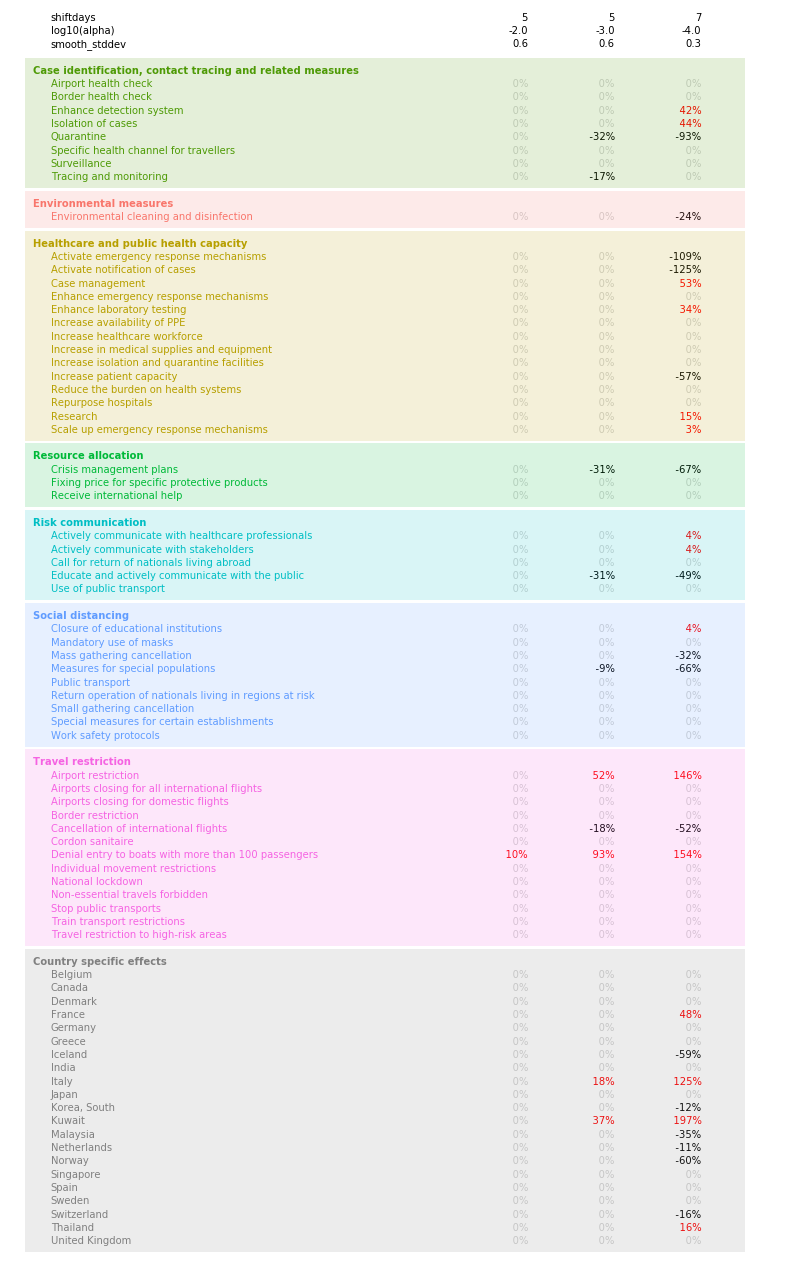

In [58]:
def significanceColor(beta):
    if beta   >  0.00: return 'red'
    elif beta == 0.00: return 'lightgray'
    else:              return 'black'

    
l1list = list(measure_level_dict.keys())
l1list.sort()

fig,ax = plt.subplots(figsize = (14,23))

i = 0
groupcolor = 0

label_x = 1
label_x_header = .6
value_x  = 12
value_dx = 2
boxalpha = .15
ax.annotate('Country specific effects',[label_x_header, len(countrylist)], c = colornames[groupcolor], weight = 'bold' )

background = plt.Rectangle([label_x - .6, i - .65], value_x + (len(final_meta_parameters)-1)*2 + .6, len(countrylist) + 1.8, fill = True, fc = colornames[groupcolor], alpha = boxalpha, zorder = 10)
ax.add_patch(background)


for country in countrylist[::-1]:
    ax.annotate(country, [label_x, i], c= colornames[groupcolor])
    for j in range(len(final_meta_parameters)):
        beta_val = results_final[j].params['C(Country)[T.{}]'.format(country)] / intercept[j]
        c = significanceColor(beta_val)
        ax.annotate('{:6.0f}%'.format(beta_val*100),[value_x + j * value_dx, i], c = c, ha = 'right')
    i += 1

groupcolor += 1

i+=2 

for l1 in l1list[::-1]:
    ax.annotate(l1,[label_x_header, i + len(measure_level_dict[l1])], c = colornames[groupcolor], weight = 'bold')
    l2list = list(measure_level_dict[l1].keys())
    l2list.sort()
    
    background = plt.Rectangle([label_x - .6, i - .65], value_x + 2*(len(final_meta_parameters)-1) + .6, len(measure_level_dict[l1]) + 1.8, fill = True, fc = colornames[groupcolor], alpha = boxalpha, zorder = 10)
    ax.add_patch(background)
    
    for l2 in l2list[::-1]:
        ax.annotate(l2,[label_x,i],c = colornames[groupcolor])
        for j in range(len(final_meta_parameters)):
            beta_val = results_final[j].params[measure_level_dict[l1][l2]] / intercept[j]
            c = significanceColor(beta_val)
            ax.annotate('{:6.0f}%'.format(beta_val*100),[value_x + j * value_dx, i], c = c, ha = 'right')
        i+=1
    i+=2
    groupcolor += 1
        #print('  {:60s} {:6.3f}'.format(l2,results_final.params[measure_level_dict[l1][l2]]/intercept))

ax.annotate('shiftdays',[label_x,i+2])
ax.annotate('log10(alpha)',[label_x,i+1])
ax.annotate('smooth_stddev',[label_x,i+0])
for j in range(len(final_meta_parameters)):
    ax.annotate('{}'.format(final_meta_parameters[j][0]),               [value_x + j*value_dx,i+2],ha='right')
    ax.annotate('{:.1f}'.format(np.log10(final_meta_parameters[j][1])), [value_x + j*value_dx,i+1],ha='right')        
    ax.annotate('{:.1f}'.format(np.log10(final_meta_parameters[j][2])), [value_x + j*value_dx,i+0],ha='right')        

ax.set_xlim([0,value_x + 2 * len(final_meta_parameters)])
ax.set_ylim([-1,i+3])
ax.axis('off')
plt.savefig('effects_measures.pdf')


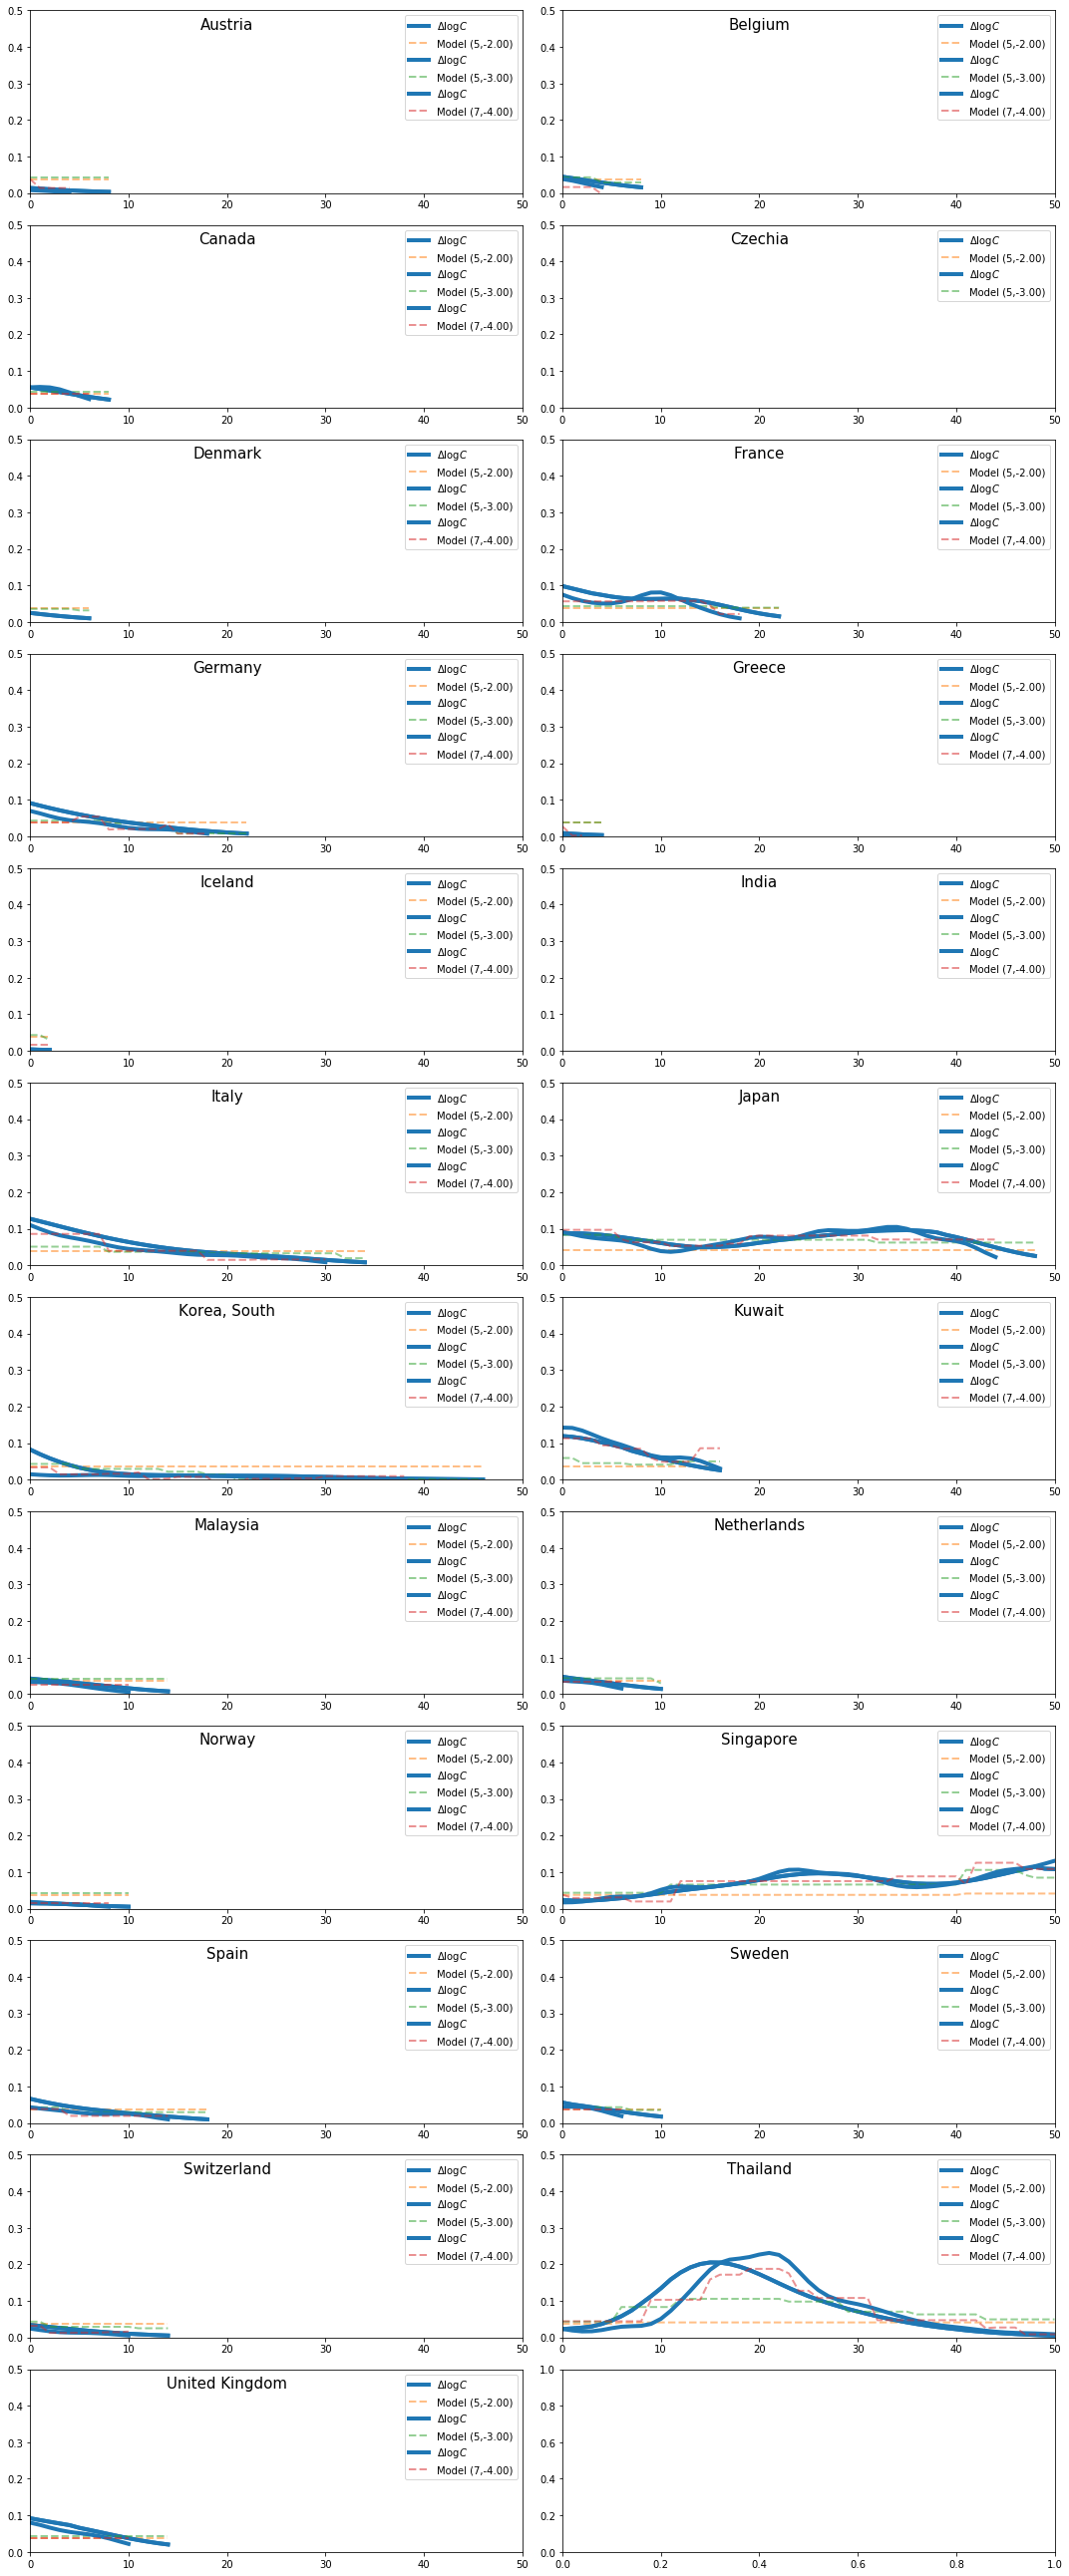

In [63]:
#specialcountries = ['Austria','Germany','Thailand', 'Italy', 'Spain', 'Sweden',
#                    'Japan', 'Hungary', 'France', 'Mexico', 'Netherlands', 'Korea, South']

colornames = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]

specialcountries = regrDF_final[0]['Country'].unique()
cm = rm.GetCountryMasks(regrDF_final[0])

plotxcount = int(len(specialcountries)/2) + len(specialcountries)%2

fig,ax = plt.subplots(plotxcount,2,figsize = (15,3*plotxcount))
ax = ax.flatten()

for i,country in enumerate(specialcountries):
    for j,(s,alpha,smooth) in enumerate(final_meta_parameters):
        if country in regrDF_final[j]['Country'].values:
            
            boolidx = (regrDF_final[j]['Country'] == country)
            dlc = np.array(regrDF_final[j][boolidx]['Observable'])
            ax[i].plot(dlc, lw = 4, c = colornames[0], label = r'$\Delta \log C$')

            pred = results_final[j].predict()[boolidx]
            ax[i].plot(pred, lw = 2, c = colornames[(j+1)%(len(colornames))], linestyle = '--', label = 'Model ({:.0f},{:.2f})'.format(s,np.log10(alpha)),alpha = .5)
    ax[i].set_ylim([0,.5])
    ax[i].set_xlim([0,50])
    ax[i].annotate(country, [20,.45],ha = 'center',fontsize = 15)
    ax[i].legend()
fig.tight_layout()
plt.savefig('regression_trajectories.pdf')


In [64]:
def modelname(index):
    return 'm{} ({},{})'.format(index,final_meta_parameters[index][0],final_meta_parameters[index][1])

colornames    = ['#f563e2','#609cff','#00bec4','#00b938','#b79f00','#f8766c']
measurecolors = {l1:col for l1,col in zip(measure_level_dict.keys(),colornames)}
model_count   = len(final_meta_parameters)
intercept     = [np.array(results_final[i].params['Intercept']) for i in range(model_count)]

inverse_mld   = {}
for l1 in measure_level_dict.keys():
    for l2 in measure_level_dict[l1].keys():
        inverse_mld[measure_level_dict[l1][l2]] = (l1,l2)

modelDF       = pd.DataFrame(columns=[modelname(i) for i in range(model_count)])

allparamnames = list(set([mn for i in range(model_count) for mn in results_final[i].params.keys() if mn[:3] != 'C(C']))
allparamnames.remove('Intercept')

for paramname in allparamnames:
    paramvaluedict = {}
    for i in range(model_count):
        paramvaluedict[modelname(i)] = float(results_final[i].params[paramname]/intercept[i])
    modelDF.loc[paramname] = paramvaluedict
    
modelDF['average'] = modelDF.mean(numeric_only = True, axis = 1)
modelDF.sort_values(by = 'average', inplace = True, ascending = False)

modelDF.to_csv('measure_effects_various_models.csv')

#print(list(modelDF.index))

l1_pos = -3
l2_pos = -2.5

def plotbox(ax, ypos = 1, label = '', color = '#ffffff', boxalpha = .2, header = False):
    background = plt.Rectangle([l2_pos - .05, ypos - .4], -l2_pos + 1.05, .9, fill = True, fc = color, alpha = boxalpha, zorder = 10)
    ax.add_patch(background)
    if not header:
        ax.annotate(label, [l2_pos,ypos-.1])
    else:
        ax.annotate(label, [l2_pos,ypos-.1], c = color, weight = 'bold')

averaged_beta = finalCV.apply(['mean','std'],axis = 0)
averaged_beta2 = finalCV.groupby(['shiftdays','alpha']).agg(['mean','std'],axis = 0)

fCVrelative = finalCV.divide(finalCV['Intercept'],axis = 0)
fCVrelative[['shiftdays','alpha']] = finalCV[['shiftdays','alpha']]
averaged_beta3 = fCVrelative.apply(['mean','std'],axis = 0).T
#averaged_beta3.sort_values(by = 'mean', ascending = False, inplace = True)

averaged_beta4 = averaged_beta3.loc[list(modelDF.index),:]
averaged_beta4.sort_values(by = 'mean', axis = 0,inplace = True,ascending = False)
#print(averaged_beta4['mean'])

betascaling = 10/3.
fig,ax = plt.subplots(figsize = (15,20))
for j,(index,values) in enumerate(averaged_beta4.iterrows()):
    #ax.annotate(inverse_mld[index][0],[l1_pos,j],c = measurecolors[inverse_mld[index][0]])
    #ax.annotate(inverse_mld[index][1],[l2_pos,j])
    plotbox(ax,ypos = j,label = inverse_mld[index][1], color = measurecolors[inverse_mld[index][0]])
    ax.errorbar(np.array([averaged_beta3['mean'][index]])*betascaling,[j],xerr=np.array([averaged_beta3['std'][index]])*betascaling, c = measurecolors[inverse_mld[index][0]], marker = 'D')

ax.set_xlim([-3.1,1.2])

for o,vertline in enumerate(np.arange(10)*betascaling/10.):
    if vertline != 0 and -1 <= vertline  <= 1:
        ax.plot([vertline,vertline],[-.7,j+.7],c = 'lightgray',zorder = -3,lw =1)
        ax.plot([-vertline,-vertline],[-.7,j+.7],c = 'lightgray',zorder = -3,lw =1)
        ax.annotate('-{:d}%'.format(o*10),[-vertline,j+1.5],fontsize = 12,c='gray',ha='center')
        ax.annotate('{:d}%'.format(o*10),[vertline,j+1.5],fontsize = 12,c='gray',ha='center')
ax.plot([-1,-1],[-1,j+1], lw = 2, c = 'black',zorder = -2)
ax.plot([0,0],[-1,j+1], lw = 2, c = 'black', zorder = -2)
ax.plot([1,1],[-1,j+1], lw = 2, c = 'black', zorder = -2)
ax.annotate('0%',[0,j+1.5],fontsize = 12, c='gray',ha='center')

for k,l1 in enumerate(sorted(measure_level_dict.keys())[::-1]):
    plotbox(ax,ypos = j + k + 3, label = l1, color = measurecolors[l1], header = True)

ax.set_ylim([-2,j+k+4])
    
ax.axis('off')
plt.savefig('effects_measures_various_models3.pdf')



TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [ ]:
def modelname(index):
    return 'm{} ({},{})'.format(index,final_meta_parameters[index][0],final_meta_parameters[index][1])

colornames    = ['#f563e2','#609cff','#00bec4','#00b938','#b79f00','#f8766c']
measurecolors = {l1:col for l1,col in zip(measure_level_dict.keys(),colornames)}
model_count   = len(final_meta_parameters)
intercept     = [np.array(results_final[i].params['Intercept']) for i in range(model_count)]

inverse_mld   = {}
for l1 in measure_level_dict.keys():
    for l2 in measure_level_dict[l1].keys():
        inverse_mld[measure_level_dict[l1][l2]] = (l1,l2)

modelDF       = pd.DataFrame(columns=[modelname(i) for i in range(model_count)])

allparamnames = list(set([mn for i in range(model_count) for mn in results_final[i].params.keys() if mn[:3] != 'C(C']))
allparamnames.remove('Intercept')

for paramname in allparamnames:
    paramvaluedict = {}
    for i in range(model_count):
        paramvaluedict[modelname(i)] = float(results_final[i].params[paramname]/intercept[i])
    modelDF.loc[paramname] = paramvaluedict
    
modelDF['average'] = modelDF.mean(numeric_only = True, axis = 1)
modelDF.sort_values(by = 'average', inplace = True, ascending = False)

modelDF.to_csv('measure_effects_various_models.csv')

#print(list(modelDF.index))

l1_pos = -3
l2_pos = -2.5

def plotbox(ax, ypos = 1, label = '', color = '#ffffff', boxalpha = .2, header = False):
    background = plt.Rectangle([l2_pos - .05, ypos - .4], -l2_pos + 1.05, .9, fill = True, fc = color, alpha = boxalpha, zorder = 10)
    ax.add_patch(background)
    if not header:
        ax.annotate(label, [l2_pos,ypos-.1])
    else:
        ax.annotate(label, [l2_pos,ypos-.1], c = color, weight = 'bold')

averaged_beta = finalCV.apply(['mean','std'],axis = 0)
averaged_beta2 = finalCV.groupby(['shiftdays','alpha']).agg(['mean','std'],axis = 0)

fCVrelative = finalCV.divide(finalCV['Intercept'],axis = 0)
fCVrelative[['shiftdays','alpha']] = finalCV[['shiftdays','alpha']]
averaged_beta3 = fCVrelative.apply(['mean','std'],axis = 0).T
#averaged_beta3.sort_values(by = 'mean', ascending = False, inplace = True)

averaged_beta4 = averaged_beta3.loc[list(modelDF.index),:]
averaged_beta4.sort_values(by = 'mean', axis = 0,inplace = True,ascending = False)
#print(averaged_beta4['mean'])

betascaling = 10/3.
fig,ax = plt.subplots(figsize = (15,20))
for j,(index,values) in enumerate(averaged_beta4.iterrows()):
    #ax.annotate(inverse_mld[index][0],[l1_pos,j],c = measurecolors[inverse_mld[index][0]])
    #ax.annotate(inverse_mld[index][1],[l2_pos,j])
    plotbox(ax,ypos = j,label = inverse_mld[index][1], color = measurecolors[inverse_mld[index][0]])
    ax.errorbar(np.array([averaged_beta3['mean'][index]])*betascaling,[j],xerr=np.array([averaged_beta3['std'][index]])*betascaling, c = measurecolors[inverse_mld[index][0]], marker = 'D')

ax.set_xlim([-3.1,1.2])

for o,vertline in enumerate(np.arange(10)*betascaling/10.):
    if vertline != 0 and -1 <= vertline  <= 1:
        ax.plot([vertline,vertline],[-.7,j+.7],c = 'lightgray',zorder = -3,lw =1)
        ax.plot([-vertline,-vertline],[-.7,j+.7],c = 'lightgray',zorder = -3,lw =1)
        ax.annotate('-{:d}%'.format(o*10),[-vertline,j+1.5],fontsize = 12,c='gray',ha='center')
        ax.annotate('{:d}%'.format(o*10),[vertline,j+1.5],fontsize = 12,c='gray',ha='center')
ax.plot([-1,-1],[-1,j+1], lw = 2, c = 'black',zorder = -2)
ax.plot([0,0],[-1,j+1], lw = 2, c = 'black', zorder = -2)
ax.plot([1,1],[-1,j+1], lw = 2, c = 'black', zorder = -2)
ax.annotate('0%',[0,j+1.5],fontsize = 12, c='gray',ha='center')

for k,l1 in enumerate(sorted(measure_level_dict.keys())[::-1]):
    plotbox(ax,ypos = j + k + 3, label = l1, color = measurecolors[l1], header = True)

ax.set_ylim([-2,j+k+4])
    
ax.axis('off')
plt.savefig('effects_measures_various_models3.pdf')



In [ ]:
import pickle

pickle.dump(regrDF, open('pickle/regrDF.pickle','wb'))
pickle.dump(regrDF_test, open('pickle/regrDF_test.pickle','wb'))
pickle.dump(regrDF_train, open('pickle/regrDF_train.pickle','wb'))
pickle.dump(model_excludeC, open('pickle/model_excludeC.pickle','wb'))
pickle.dump(model_singleC, open('pickle/model_singleC.pickle','wb'))
